# Steps

1. Load the image
2. Format conversion using np.float32
3. Fourier changes using cv2.dft

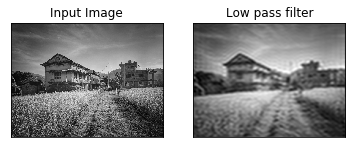

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('photo.jpg',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

rows, cols = img.shape
crow, ccol = rows/2,cols/2

#create mask first,center square is 1,remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[int(crow - 30):int(crow + 30),int(ccol - 30):int(ccol + 30)] = 1

#apply mask and inverse DFT
fshift = dft_shift*mask
f_shift = np.fft.fftshift(fshift)
img_back = cv2.idft(f_shift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Input Image'),plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(img_back,cmap = 'gray')
plt.title('Low pass filter'),plt.xticks([]),plt.yticks([])
plt.show()
